<a href="https://colab.research.google.com/github/NARizzardi/machine-learning/blob/main/Trabalho/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Começamos com os imports:

In [ ]:
import kagglehub
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/bcc/nar20/25-2/ML/Trabalho/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Como a ideia é gerar um modelo que reconheça cogumelos que são comestíveis ou não, optamos por usar um dataset baseado em atributos pois poderíamos integrar o mesmo a um questionário que retorne a possibilidade do cogumelo ser comestível, já que um baseado em imagem pode acabar dependendo de uma foto bem tirada.<br>
Dataset de classificação de cogumelos baseado em atributos:<br>
https://www.kaggle.com/datasets/uciml/mushroom-classification<br>





In [ ]:
path = kagglehub.dataset_download("uciml/mushroom-classification")+'/mushrooms.csv'

mushrooms = pd.read_csv(path)
display(path)

Seguimos verificando quantos cogumelos temos com cada cor de píleo (nome científico do "chapéu" do cogumelo), bem como quantos destes são comestíveis e quantos são venenosos

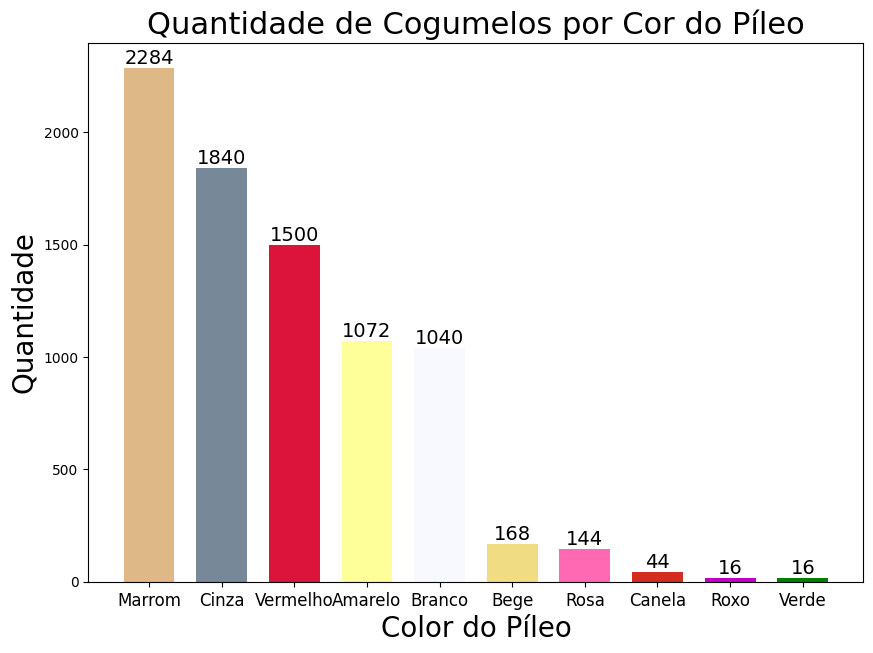

In [3]:
cap_colors = mushrooms['cap-color'].value_counts()
m_height = cap_colors.values.tolist()
cap_colors.axes
cap_color_labels = cap_colors.axes[0].tolist()


ind = np.arange(10)
width = 0.7
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']

fig, ax = plt.subplots(figsize=(10,7))

mushroom_bars = ax.bar(ind, m_height, width, color=colors)


#Add some text for labels, title and axes ticks
ax.set_xlabel("Color do Píleo",fontsize=20)
ax.set_ylabel('Quantidade',fontsize=20)
ax.set_title('Quantidade de Cogumelos por Cor do Píleo',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('Marrom', 'Cinza','Vermelho','Amarelo','Branco','Bege','Rosa','Canela','Roxo','Verde'),
                  fontsize = 12)

def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show() 

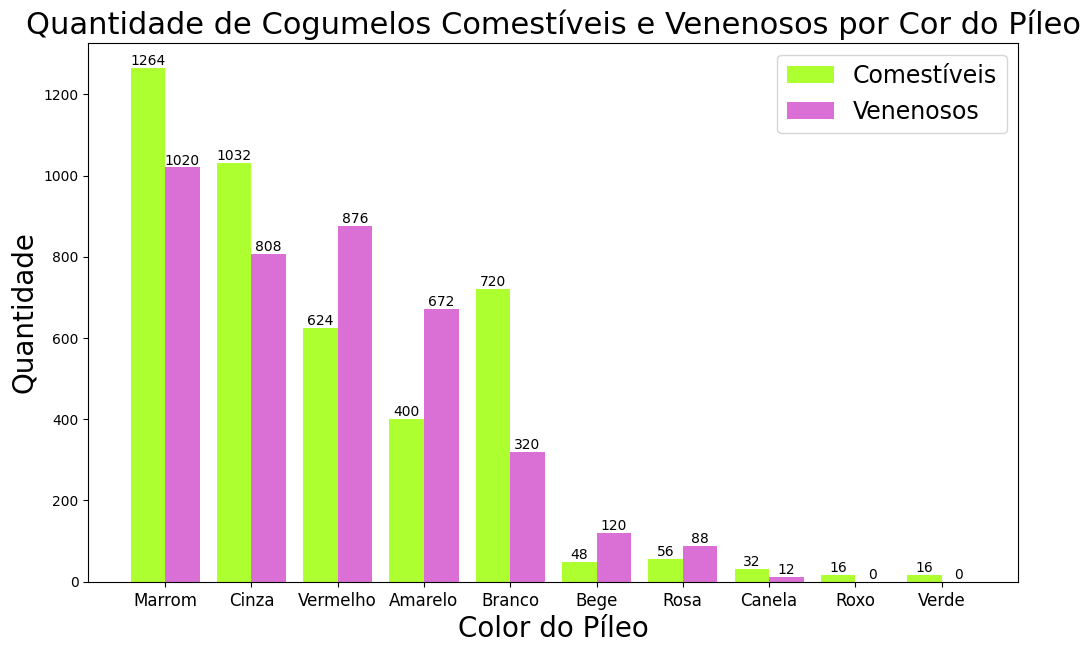

In [4]:
poisonous_cc = []
edible_cc = []
for capColor in cap_color_labels:
    size = len(mushrooms[mushrooms['cap-color'] == capColor].index)
    edibles = len(mushrooms[(mushrooms['cap-color'] == capColor) & (mushrooms['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        

width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#DA70D6')



ax.set_xlabel("Color do Píleo",fontsize=20)
ax.set_ylabel('Quantidade',fontsize=20)
ax.set_title('Quantidade de Cogumelos Comestíveis e Venenosos por Cor do Píleo',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('Marrom', 'Cinza','Vermelho','Amarelo','Branco','Bege','Rosa','Canela','Roxo','Verde'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('Comestíveis','Venenosos'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()

Como podemos ver, os tipos de cogumelo são muito variados entre as diversas cores, com exceção dos cogumelos roxos e verdes, portanto precisamos de mais informação para conseguir classificar.
Vamos seguir analisando outros aspectos, sendo o próximo uma infomração fácil de se obter manualmente, o odor do cogumelo.

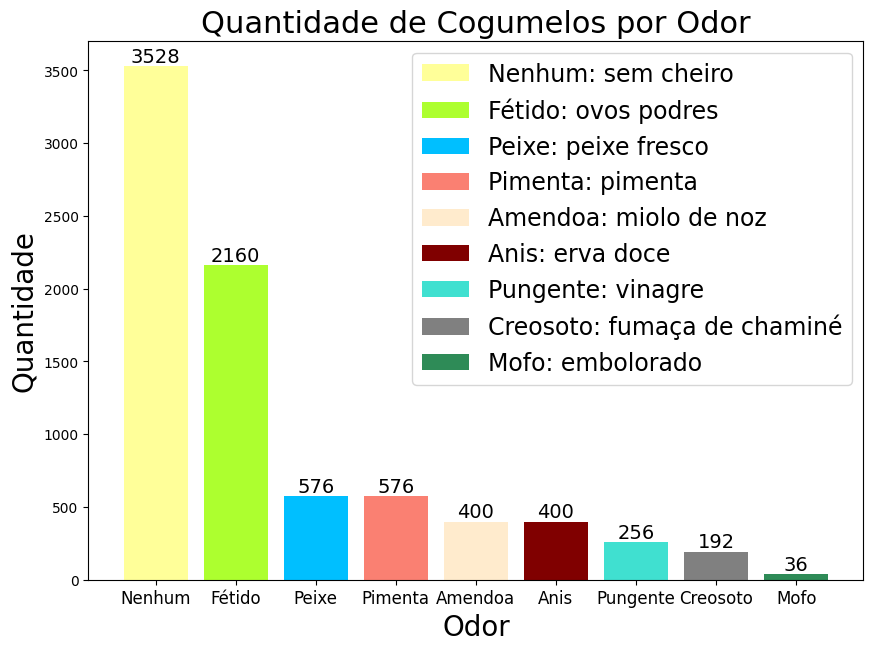

In [5]:
odors = mushrooms['odor'].value_counts()
odor_height = odors.values.tolist()
odor_labels = odors.axes[0].tolist()

width = 0.8 
ind = np.arange(9) 
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)


ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantidade',fontsize=20)
ax.set_title('Quantidade de Cogumelos por Odor',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('Nenhum', 'Fétido','Peixe','Pimenta','Amendoa','Anis','Pungente','Creosoto','Mofo'),
                  fontsize = 12)
ax.legend(odor_bars, ['Nenhum: sem cheiro','Fétido: ovos podres', 'Peixe: peixe fresco','Pimenta: pimenta',
                      'Amendoa: miolo de noz', 'Anis: erva doce', 'Pungente: vinagre',
                     'Creosoto: fumaça de chaminé', 'Mofo: embolorado'],fontsize=17)
autolabel(odor_bars)        
plt.show() #Display bars. 

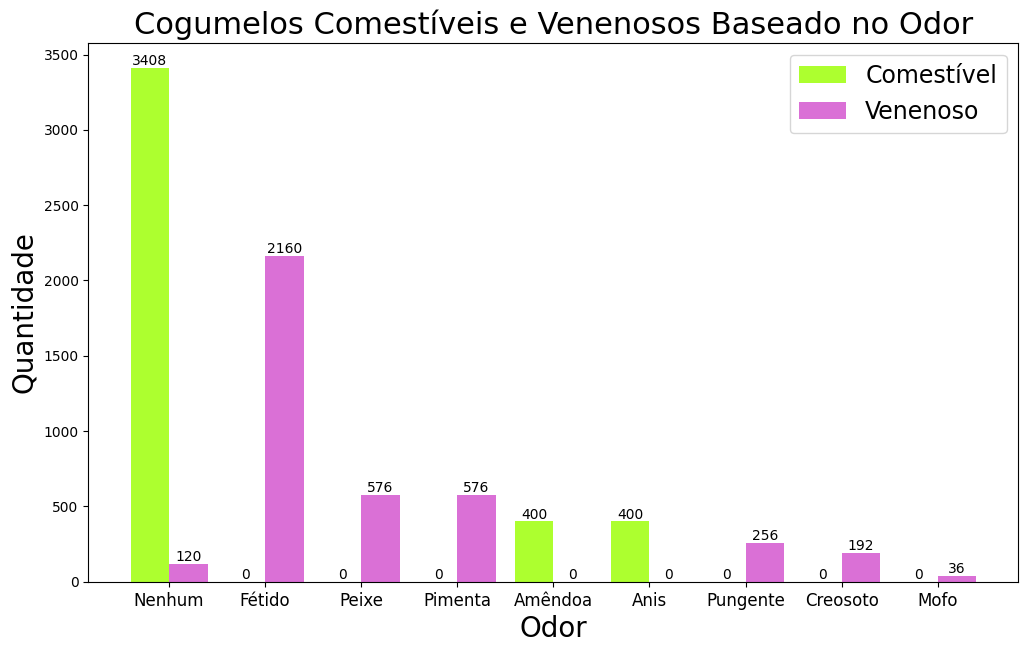

In [6]:
poisonous_od = [] 
edible_od = []    
for odor in odor_labels:
    size = len(mushrooms[mushrooms['odor'] == odor].index)
    edibles = len(mushrooms[(mushrooms['odor'] == odor) & (mushrooms['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DA70D6')


ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantidade',fontsize=20)
ax.set_title('Cogumelos Comestíveis e Venenosos Baseado no Odor',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('Nenhum', 'Fétido','Peixe','Pimenta','Amêndoa','Anis','Pungente','Creosoto','Mofo'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('Comestível','Venenoso'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()

Podemos ver que a divisão por odor traz uma distinção muito clara de quais os cogumelos são comestíveis e quais cogumelos são venenosos, o único caso que possui algum risco acaba sendo quando o cogumelo não possui cheiro, tendo 3% de chance do cogumelo não ser comestível. <br>Partindo agora para examinar sobre como o cogumelo se agrupa em populações, seja individual ou em grupo:

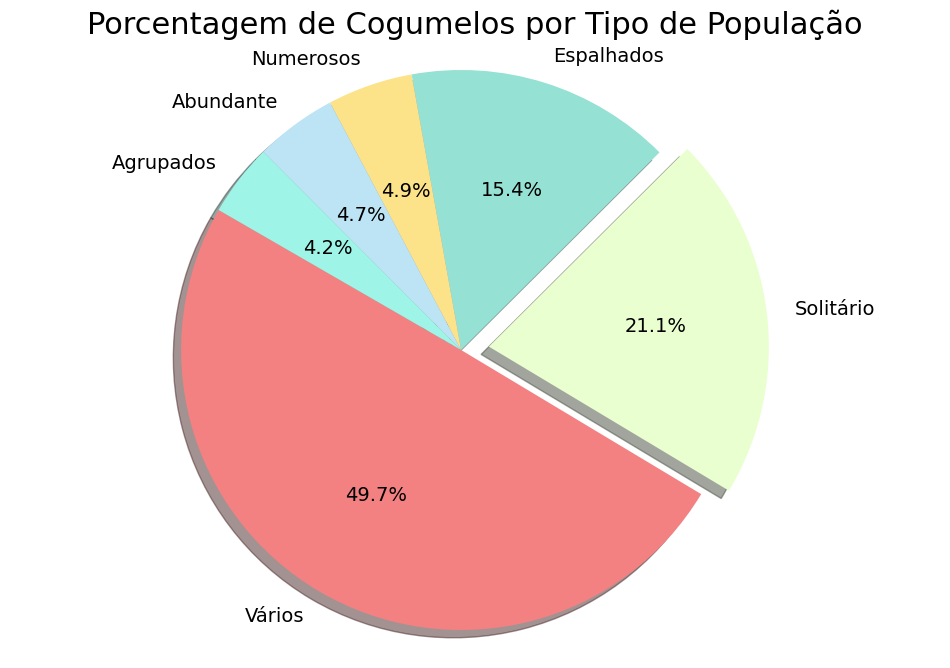

In [7]:
populations = mushrooms['population'].value_counts()
pop_size = populations.values.tolist() 
pop_types = populations.axes[0].tolist() 

# Data to plot
pop_labels = 'Vários', 'Solitário', 'Espalhados', 'Numerosos', 'Abundante', 'Agrupados'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Porcentagem de Cogumelos por Tipo de População', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

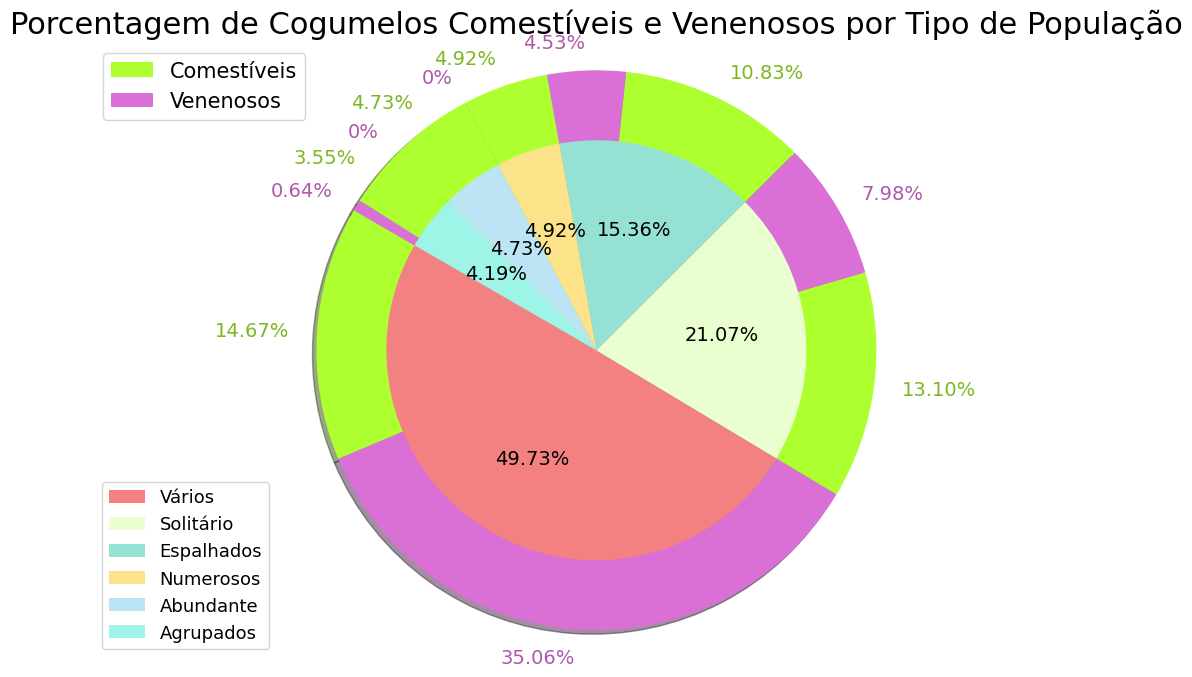

In [8]:

poisonous_pop = []
edible_pop = []
for pop in pop_types: 
    size = len(mushrooms[mushrooms['population'] == pop].index)
    edibles = len(mushrooms[(mushrooms['population'] == pop) & (mushrooms['class'] == 'e')].index)
    edible_pop.append(edibles) 
    poisonous_pop.append(size-edibles)
combine_ed_poi = []
for i in range(0,len(edible_pop)):
    combine_ed_poi.append(edible_pop[i])
    combine_ed_poi.append(poisonous_pop[i])


fig = plt.subplots(figsize=(13,8))
plt.title('Porcentagem de Cogumelos Comestíveis e Venenosos por Tipo de População', fontsize=22)
percentages_e_p = ['14.67%','35.06%','13.10%', '7.98%','10.83%','4.53%','4.92%','0%','4.73%','0%',
                  '3.55%','0.64%'] 

patches1, texts1 = plt.pie(combine_ed_poi,radius = 2, labels= percentages_e_p,
                                colors=['#ADFF2F','#DA70D6'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721') 
    else:
        texts1[i].set_color('#AE59AB') 
    texts1[i].set_fontsize(14)         
#===Second pie===
patches2, texts2, autotexts2 = plt.pie(pop_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  #Inner autotext fontsize
    aut.set_horizontalalignment('center') #Center
#==Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['Comestíveis','Venenosos'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, pop_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()

A forma como os cogumelos se acumulam varia muito, no entanto quanto maior o agrupamento deles, maior a probabilidade deles serem comestíveis. Por último, antes de treinarmos o nosso modelo vamos analisar como os cogumelos se dividem por habitat:

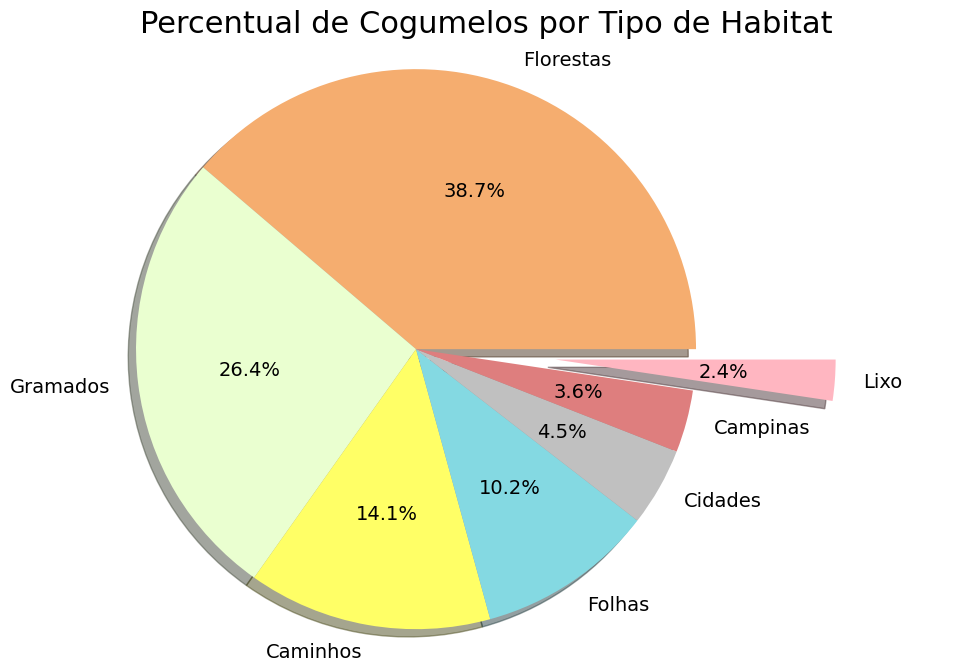

In [9]:

habitats = mushrooms['habitat'].value_counts()
hab_size = habitats.values.tolist()
hab_types = habitats.axes[0].tolist()

hab_labels = 'Florestas', 'Gramados', 'Caminhos', 'Folhas', 'Cidades', 'Campinas', 'Lixo'
colors = ['#F5AD6F','#EAFFD0','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#FFB6C1']
explode = (0, 0, 0, 0, 0, 0,0.5)
fig = plt.figure(figsize=(12,8))

plt.title('Percentual de Cogumelos por Tipo de Habitat', fontsize=22)
patches, texts, autotexts = plt.pie(hab_size, explode=explode, labels=hab_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

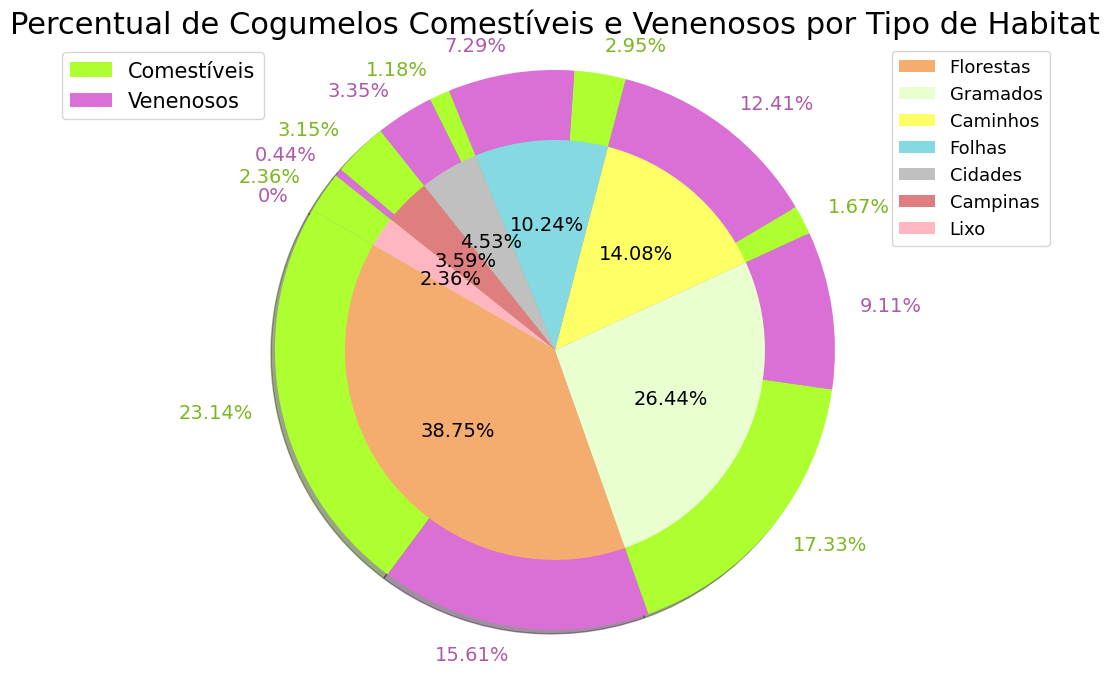

In [10]:
poisonous_hab = []
edible_hab = []
for hab in hab_types: 
    size = len(mushrooms[mushrooms['habitat'] == hab].index)
    edibles = len(mushrooms[(mushrooms['habitat'] == hab) & (mushrooms['class'] == 'e')].index)
    edible_hab.append(edibles)
    poisonous_hab.append(size-edibles)
combine_ed_poi = []
for i in range(0,len(edible_hab)):
    combine_ed_poi.append(edible_hab[i])
    combine_ed_poi.append(poisonous_hab[i])


fig = plt.subplots(figsize=(13,8))
plt.title('Percentual de Cogumelos Comestíveis e Venenosos por Tipo de Habitat', fontsize=22)
percentages_e_p = ['23.14%','15.61%','17.33%', '9.11%','1.67%','12.41%','2.95%','7.29%','1.18%','3.35%',
                  '3.15%','0.44%','2.36%','0%']

patches1, texts1= plt.pie(combine_ed_poi,radius = 2, labels=percentages_e_p,
                                colors=['#ADFF2F','#DA70D6'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721')
    else:
        texts1[i].set_color('#AE59AB')
    texts1[i].set_fontsize(14)        

patches2, texts2, autotexts2 = plt.pie(hab_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  
    aut.set_horizontalalignment('center')

first_legend   = plt.legend(patches1, ['Comestíveis','Venenosos'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, hab_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend)

plt.axis('equal')
plt.show()

Neste gráfico podemos perceber que a divisão de local onde os cogumelos são encontrados dificulta muito saber se eles são comestíveis ou venenosos, com exceção de cogumelos encontrados em ambientes de lixo, que são classificados todos como comestíveis. (Apesar de achar pouco provável, por questões de higiene, que alguém vá comer cogumelos encontrados em ambientes de lixo)

Com base nisso podemos perceber que um modelo de classificação de Decision Tree pode apresentar resultados significativos, já que as características do nosso dataset favorecem o mesmo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = mushrooms.drop(columns=['class'])
y = mushrooms['class']

le_dict = {}
X_encoded = X.copy()

for column in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X_encoded[column])
    le_dict[column] = le

le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=le_y.classes_))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia do modelo: 1.0000

Relatório de Classificação:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Matriz de Confusão:
[[843   0]
 [  0 782]]


Como podemos ver, a escolha de utilizar um classificador de árvore de decisão se pagou, já que obtivemos uma acurácia de 1 para o nosso modelo, apesar de ser esperado um resultado bom não era esperado um modelo tão preciso e isso acabou gerando uma falta de desafio para o nosso trabalho, com isso migramos de dataset, mantendo o mesmo tema, de classificação de cogumelos.